# A/B Testing in Python

This notebook demonstrates how to implement A/B testing using a two-proportion z-test in Python.

We are testing whether a light blue background increases conversion rate compared to a white background.

## Scenario

We have two versions of a webpage:

- Version A: White background — 5,000 visitors, 250 purchases
- Version B: Light blue background — 5,000 visitors, 300 purchases

We want to test if the difference in conversion rates is statistically significant.

### Hypotheses

- **Null Hypothesis (H₀):** No difference in conversion rates  
- **Alternative Hypothesis (H₁):** There is a difference in conversion rates

In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Data
conversions = np.array([250, 300])  # Number of purchases
visitors = np.array([5000, 5000])   # Number of visitors

In [3]:
# Run the z-test
stat, p_value = proportions_ztest(count=conversions, nobs=visitors, alternative='two-sided')
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between the versions.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

Z-statistic: -2.1932
P-value: 0.0283
Reject the null hypothesis: Significant difference between the versions.


### Visualising the Conversion Rates

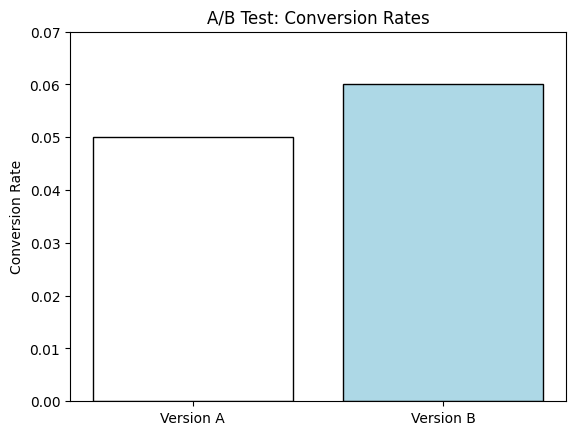

In [4]:
import matplotlib.pyplot as plt

labels = ['Version A', 'Version B']
conversion_rates = conversions / visitors

plt.bar(labels, conversion_rates, color=['white', 'lightblue'], edgecolor='black')
plt.ylabel('Conversion Rate')
plt.title('A/B Test: Conversion Rates')
plt.ylim(0, 0.07)
plt.show()